In [2]:
import numpy as np
import matplotlib.pyplot as plt

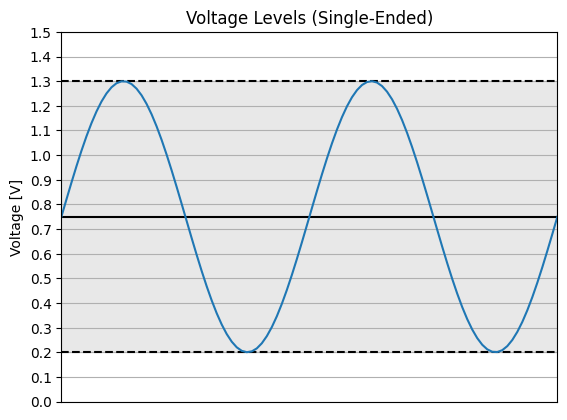

In [3]:
vdd = 1.5
vss = 0.0
vmargin = 0.2

vcm = (vdd + vss) / 2
vamp = (vdd - vss) / 2 - vmargin
vmin = round(vcm - vamp, 3)
vmax = round(vcm + vamp, 3)

plt.figure()
plt.plot([0, 1], [vmin, vmin], 'k--', label='Vmin')
plt.plot([0, 1], [vmax, vmax], 'k--', label='Vmax')
plt.plot([0, 1], [vcm, vcm], 'k-', label='Vcm')
plt.fill_between([0, 1], vmin, vmax, color='lightgray', alpha=0.5, label='Valid Range')
plt.plot(np.linspace(0, 1, 100), np.sin(np.linspace(0, 1, 100) * 4 * np.pi) * vamp + vcm, label='Signal')
plt.ylim(vss, vdd)
plt.xlim(0, 1)
plt.yticks(np.arange(vss, vdd + 0.1, 0.1))
plt.xticks([])
plt.grid()
plt.title('Voltage Levels (Single-Ended)')
plt.ylabel('Voltage [V]')
# plt.legend()
plt.show()

-1.1 1.1
0.00859375


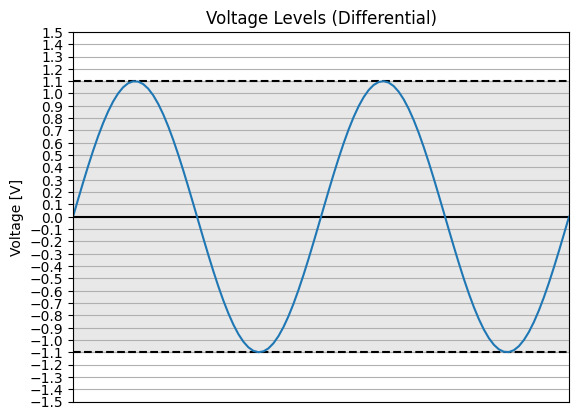

In [4]:
vcm_diff = 0
vamp_diff = vamp * 2
vmin_diff = round(vcm_diff - vamp_diff, 3)
vmax_diff = round(vcm_diff + vamp_diff, 3)
print(vmin_diff, vmax_diff)

lsb = (vmax_diff - vmin_diff) / 2**8
print(lsb)



plt.figure()
plt.plot([0, 1], [vmin_diff, vmin_diff], 'k--', label='Vmin')
plt.plot([0, 1], [vmax_diff, vmax_diff], 'k--', label='Vmax')
plt.plot([0, 1], [vcm_diff, vcm_diff], 'k-', label='Vcm')
plt.fill_between([0, 1], vmin_diff, vmax_diff, color='lightgray', alpha=0.5, label='Valid Range')
plt.plot(np.linspace(0, 1, 100), np.sin(np.linspace(0, 1, 100) * 4 * np.pi) * vamp_diff + vcm_diff, label='Signal')
plt.ylim(vss - vdd, vdd - vss)
plt.xlim(0, 1)
plt.yticks(np.arange(vss - vdd, vdd - vss + 0.1, 0.1))
plt.xticks([])
plt.grid()
plt.title('Voltage Levels (Differential)')
plt.ylabel('Voltage [V]')
# plt.legend()
plt.show()

256
[  8  23  38  53  68  83  98 113 128 143 158 173 188 203 218 233 248]


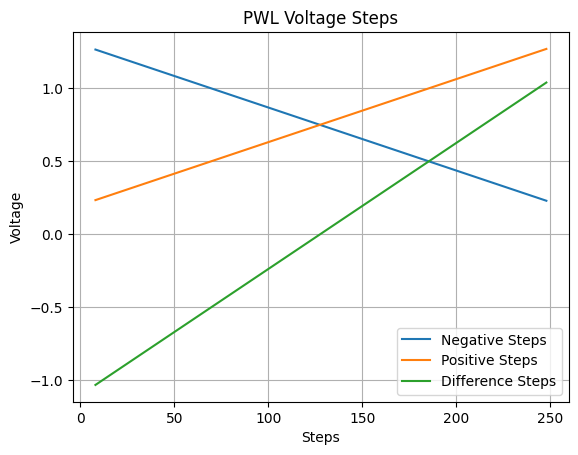

In [14]:
resolution = 8
start_code = 8
end_code = 255
step_code = 15

max_code = 2**resolution - 1
print(max_code + 1)
steps = np.arange(start_code, end_code + 1, step_code)
print(steps)
vneg_steps = (vmax * (max_code - steps) + vmin * steps) / max_code
vpos_steps = (vmax * steps + vmin * (max_code - steps)) / max_code
vdiff_steps = vpos_steps - vneg_steps

plt.figure()
plt.plot(steps, vneg_steps, label='Negative Steps')
plt.plot(steps, vpos_steps, label='Positive Steps')
plt.plot(steps, vdiff_steps, label='Difference Steps')
plt.xlabel('Steps')
plt.ylabel('Voltage')
plt.title('PWL Voltage Steps')
plt.grid()
plt.legend()
plt.show()

In [15]:
print(vpos_steps)
print(vneg_steps)

[0.2345098  0.29921569 0.36392157 0.42862745 0.49333333 0.55803922
 0.6227451  0.68745098 0.75215686 0.81686275 0.88156863 0.94627451
 1.01098039 1.07568627 1.14039216 1.20509804 1.26980392]
[1.2654902  1.20078431 1.13607843 1.07137255 1.00666667 0.94196078
 0.8772549  0.81254902 0.74784314 0.68313725 0.61843137 0.55372549
 0.48901961 0.42431373 0.35960784 0.29490196 0.23019608]


In [16]:
test_initial_time = 8
test_interval_time = 9


def generate_pwl(t_init: int, t_interval: int, voltages: np.ndarray) -> str:
    times = np.arange(t_init, t_init + len(voltages) * t_interval, t_interval)
    times = np.repeat(times, 2)
    times = np.insert(times, 0, 0)
    times = times[:-1]
    print(f"t_max: {times[-1]}")

    voltages = np.repeat(voltages, 2)

    result = "pwl("
    for t, v in zip(times, voltages):
        if t != 0:
            result += f"{{{t:d}/f}} {v:.4f} "
        else:
            result += f"0 {v:.4f} "

    return result.strip() + ")"

pwl_pos = generate_pwl(test_initial_time, test_interval_time, vpos_steps)
pwl_neg = generate_pwl(test_initial_time, test_interval_time, vneg_steps)

print(pwl_pos)
print(pwl_neg)

t_max: 152
t_max: 152
pwl(0 0.2345 {8/f} 0.2345 {8/f} 0.2992 {17/f} 0.2992 {17/f} 0.3639 {26/f} 0.3639 {26/f} 0.4286 {35/f} 0.4286 {35/f} 0.4933 {44/f} 0.4933 {44/f} 0.5580 {53/f} 0.5580 {53/f} 0.6227 {62/f} 0.6227 {62/f} 0.6875 {71/f} 0.6875 {71/f} 0.7522 {80/f} 0.7522 {80/f} 0.8169 {89/f} 0.8169 {89/f} 0.8816 {98/f} 0.8816 {98/f} 0.9463 {107/f} 0.9463 {107/f} 1.0110 {116/f} 1.0110 {116/f} 1.0757 {125/f} 1.0757 {125/f} 1.1404 {134/f} 1.1404 {134/f} 1.2051 {143/f} 1.2051 {143/f} 1.2698 {152/f} 1.2698)
pwl(0 1.2655 {8/f} 1.2655 {8/f} 1.2008 {17/f} 1.2008 {17/f} 1.1361 {26/f} 1.1361 {26/f} 1.0714 {35/f} 1.0714 {35/f} 1.0067 {44/f} 1.0067 {44/f} 0.9420 {53/f} 0.9420 {53/f} 0.8773 {62/f} 0.8773 {62/f} 0.8125 {71/f} 0.8125 {71/f} 0.7478 {80/f} 0.7478 {80/f} 0.6831 {89/f} 0.6831 {89/f} 0.6184 {98/f} 0.6184 {98/f} 0.5537 {107/f} 0.5537 {107/f} 0.4890 {116/f} 0.4890 {116/f} 0.4243 {125/f} 0.4243 {125/f} 0.3596 {134/f} 0.3596 {134/f} 0.2949 {143/f} 0.2949 {143/f} 0.2302 {152/f} 0.2302)
